# Projeto de Redes Sociais

Cicero Tiago Carneiro Valentim

Lais Nascimento da Silva

Thalia Loiola da Silva

William Augusto Reis da Silva

### Bibliotecas

In [1]:
from graph_tool import centrality, clustering, PropertyMap
from graph_tool import Graph
# from graph_tool.all import graph_draw
from netpixi.data.gt import *
from netpixi import render, peek
import netpixi
import pandas as pd
import netpixi
import numpy as np

In [2]:
df = pd.read_excel('netflix.xlsx')
df = df.dropna(subset=['Genre'])
df = df[df["Series or Movie"] == "Movie"]
df = df.reset_index()

In [3]:
LISTA_TITLES = []
lista_number = []
titles_ind = {}
for i in range(len(df)):
    if df.loc[i]["Title"] not in LISTA_TITLES:
        LISTA_TITLES.append(df.loc[i]["Title"])
        titles_ind[df.loc[i]["Title"]] = 1
        lista_number.append(1)
        
    else:
        titles_ind[df.loc[i]["Title"]] += 1
        lista_number.append(titles_ind.get(df.loc[i]["Title"]))

In [4]:
len(LISTA_TITLES)
df["qtde"] = lista_number
df = df[df["qtde"] == 1]
df = df.reset_index()

for linha in range(df.shape[0]):
    df['Genre'].loc[linha] = [genre.strip() for genre in df['Genre'].loc[linha].split(",")] 
    
titles = df["Title"]
titles

0               HOW TO BUILD A GIRL
1                  The Con-Heartist
2                     Only a Mother
3                        Snowroller
4                     The Invisible
                   ...             
6872         District 13: Ultimatum
6873                 13 Going on 30
6874                       LIFE 2.0
6875                  Brand New Day
6876    Daniel Arends: Blessuretijd
Name: Title, Length: 6877, dtype: object

In [5]:
df = df.explode('Genre')
df = df.reset_index(drop=True)
df

,level_0,index,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,...,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,qtde
0,0,1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,...,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube,1
1,1,2,The Con-Heartist,Comedy,"Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,...,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube,1
2,1,2,The Con-Heartist,Romance,"Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,...,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube,1
3,2,4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,...,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube,1
4,3,5,Snowroller,Comedy,"Sports Movies,Sports Comedies,Comedies,Swedish...","Swedish, English, German, Norwegian",Movie,5.3,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,...,NaN,https://www.netflix.com/watch/81382187,https://www.imdb.com/title/tt0090115,"Two friends take a ski trip to the Alps, where...",5926.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BZDY2NG...,https://www.youtube.com/watch?v=tjWouBLwe3c,YouTube,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18997,6991,9420,13 Going on 30,Romance,"Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese",Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,...,"Revolution Studios, Thirteen Productions LLC",https://www.netflix.com/watch/60034573,https://www.imdb.com/title/tt0337563,When a geeky teens birthday party goes awry an...,167842.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=SApIKVq1iJQ,YouTube,1
18998,6992,9421,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,...,NaN,https://www.netflix.com/watch/70129457,https://www.imdb.com/title/tt1518809,Computer users across the globe log onto the v...,878.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=2TY-O5Dc8oA,YouTube,1
18999,6993,9422,Brand New Day,Documentary,"Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,...,NaN,https://www.netflix.com/watch/70125340,NaN,In an idyllic port town on Australias west coa...,14.0,http://cdn1.nflximg.net/images/5543/12045543.jpg,NaN,https://www.youtube.com/watch?v=RnGRdaX594k,YouTube,1
19000,6993,9422,Brand New Day,Music,"Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,...,NaN,https://www.netflix.com/watch/70125340,

In [6]:
# pega todos os generos existentes do dataset 
genres = set()
for genre in df.Genre:
    genres.add(genre)

# transforma em lista 
genres = list(genres)


In [7]:
len(titles) + len(genres)

6904

In [8]:
g = Graph(directed=False)
g.vp['name'] = g.new_vp('object')
g.vp['bipartite'] = g.new_vp('object')

for i in range(len(titles)):
    g.add_vertex()
    g.vp['name'][i] = str(titles[i])
    g.vp['bipartite'][i] = 0

print('número de vértices de g:', g.num_vertices())

número de vértices de g: 6877


In [9]:
for i in range(len(genres)):
    g.add_vertex()
    g.vp['name'][i + len(titles)] = str(genres[i])
    g.vp['bipartite'][i + len(titles)] = 1
    
print('número de vértices de g total:', g.num_vertices())

número de vértices de g total: 6904


In [10]:
lista = []
for linha in range(df.shape[0]):
    title = df['Title'].loc[linha]
    genre = df['Genre'].loc[linha]
    index_title = 0
    index_genre = 0
    v = 0
    while v < g.num_vertices() - len(genres):
        if str(g.vp['name'][v]) == str(title):
            index_title = v
            break
        v += 1
    u = len(titles)
    while u < g.num_vertices():
        if str(g.vp['name'][u]) == str(genre):
            index_genre = u
            break
        u += 1
    print(f"{title}: {index_title}, {genre}: {index_genre}")
    together = []
    together.append(index_title)
    together.append(index_genre)
    if together not in lista:
        lista.append(together)

HOW TO BUILD A GIRL: 0, Comedy: 6887
The Con-Heartist: 1, Comedy: 6887
The Con-Heartist: 1, Romance: 6890
Only a Mother: 2, Drama: 6896
Snowroller: 3, Comedy: 6887
The Invisible: 4, Crime: 6893
The Invisible: 4, Drama: 6896
The Invisible: 4, Fantasy: 6881
The Invisible: 4, Mystery: 6895
The Invisible: 4, Thriller: 6889
The Simple Minded Murderer: 5, Drama: 6896
To Kill a Child: 6, Short: 6878
To Kill a Child: 6, Drama: 6896
Joker: 7, Crime: 6893
Joker: 7, Drama: 6896
Joker: 7, Thriller: 6889
I: 8, Action: 6901
I: 8, Adventure: 6894
I: 8, Fantasy: 6881
I: 8, Sci-Fi: 6880
Harrys Daughters: 9, Adventure: 6894
Harrys Daughters: 9, Drama: 6896
Harrys Daughters: 9, Fantasy: 6881
Harrys Daughters: 9, Mystery: 6895
Gyllene Tider: 10, Music: 6882
Comrades: Almost a Love Story: 11, Drama: 6896
Comrades: Almost a Love Story: 11, Romance: 6890
The Closet: 12, Comedy: 6887
The Mysterians: 13, Action: 6901
The Mysterians: 13, Family: 6879
The Mysterians: 13, Sci-Fi: 6880
The Mysterians: 13, Thriller

A Febre: 110, Drama: 6896
A Febre: 110, History: 6897
A Febre: 110, Romance: 6890
Starring Maja: 111, Comedy: 6887
Starring Maja: 111, Drama: 6896
Starring Maja: 111, Family: 6879
The Assault: 112, Action: 6901
The Assault: 112, History: 6897
The Assault: 112, Thriller: 6889
The Dream House: 113, Comedy: 6887
The Dream House: 113, Drama: 6896
The Dream House: 113, Fantasy: 6881
The Great Adventure: 114, Drama: 6896
The Great Adventure: 114, Family: 6879
The Pilgrimage to Kevlaar: 115, Drama: 6896
Ingeborg Holm: 116, Drama: 6896
Erotikon: 117, Comedy: 6887
Erotikon: 117, Romance: 6890
Career: 118, Drama: 6896
As Seen On Tv: 119, Short: 6878
As Seen On Tv: 119, Comedy: 6887
Angel: 120, Action: 6901
Angel: 120, Drama: 6896
Angel: 120, Fantasy: 6881
Angel: 120, Thriller: 6889
A Man There Was: 121, Drama: 6896
A Man There Was: 121, War: 6884
Dragon Quest: The Adventure of Dai: 122, Animation: 6900
Dragon Quest: The Adventure of Dai: 122, Action: 6901
Dragon Quest: The Adventure of Dai: 122,

Doraemon: Nobitas Chronicle of the Moon Exploration: 206, Animation: 6900
Doraemon: Nobitas Chronicle of the Moon Exploration: 206, Action: 6901
Doraemon: Nobitas Chronicle of the Moon Exploration: 206, Adventure: 6894
Doraemon: Nobitas Chronicle of the Moon Exploration: 206, Comedy: 6887
Doraemon: Nobitas Chronicle of the Moon Exploration: 206, Drama: 6896
Doraemon: Nobitas Chronicle of the Moon Exploration: 206, Family: 6879
Doraemon: Nobitas Chronicle of the Moon Exploration: 206, Fantasy: 6881
Doraemon: Nobitas Chronicle of the Moon Exploration: 206, Sci-Fi: 6880
The Vigil: 207, Horror: 6899
The Vigil: 207, Mystery: 6895
The Vigil: 207, Thriller: 6889
Saint Frances: 208, Comedy: 6887
Saint Frances: 208, Drama: 6896
Proxima: 209, Action: 6901
Proxima: 209, Adventure: 6894
Proxima: 209, Drama: 6896
Proxima: 209, Sci-Fi: 6880
HOPE GAP: 210, Drama: 6896
HOPE GAP: 210, Romance: 6890
Abe: 211, Short: 6878
Abe: 211, Horror: 6899
Abe: 211, Sci-Fi: 6880
Abe: 211, Thriller: 6889
Gangaajal: 2

What If: 294, Romance: 6890
Wind: 295, Action: 6901
Wind: 295, Drama: 6896
Wind: 295, Sport: 6898
Youre My Home: 296, Crime: 6893
Youre My Home: 296, Drama: 6896
Youre My Home: 296, Romance: 6890
Youre My Home: 296, Thriller: 6889
Yahsi Bati: 297, Adventure: 6894
Yahsi Bati: 297, Comedy: 6887
Yahsi Bati: 297, Fantasy: 6881
Yahsi Bati: 297, Western: 6885
Living in Oblivion: 298, Comedy: 6887
Living in Oblivion: 298, Drama: 6896
Entrusted: 299, Drama: 6896
Entrusted: 299, Thriller: 6889
Arif V 216: 300, Comedy: 6887
Arif V 216: 300, Fantasy: 6881
Arif V 216: 300, Music: 6882
Arif V 216: 300, Sci-Fi: 6880
Pyromanen: 301, Crime: 6893
The Cake General: 302, Comedy: 6887
The Cake General: 302, Drama: 6896
The Violin Player: 303, Drama: 6896
The Violin Player: 303, Music: 6882
Up in the Sky: 304, Documentary: 6883
Up in the Sky: 304, History: 6897
Louis & Luca - The Big Cheese Race: 305, Mystery: 6895
Louis & Luca - The Big Cheese Race: 305, Thriller: 6889
Gilberts Grim Revenge: 306, Document

Pitch: 398, Sport: 6898
October Sonata: 399, Drama: 6896
October Sonata: 399, Romance: 6890
One More Chance: 400, Drama: 6896
One More Chance: 400, Romance: 6890
Remember When: 401, Drama: 6896
Rompis: 402, Drama: 6896
Rompis: 402, Romance: 6890
Sunny: Our Hearts Beat Together: 403, Comedy: 6887
Sunny: Our Hearts Beat Together: 403, Drama: 6896
Sunny: Our Hearts Beat Together: 403, Musical: 6902
That Girl in Pinafore: 404, Comedy: 6887
That Girl in Pinafore: 404, Musical: 6902
Titus: Mystery of the Enygma: 405, Animation: 6900
Titus: Mystery of the Enygma: 405, Comedy: 6887
Titus: Mystery of the Enygma: 405, Family: 6879
When Will You Get Married?: 406, Comedy: 6887
When Will You Get Married?: 406, Romance: 6890
You Are My Sunshine: 407, Drama: 6896
You Are My Sunshine: 407, Romance: 6890
Hello World: 408, Animation: 6900
Hello World: 408, Comedy: 6887
Hello World: 408, Drama: 6896
Hello World: 408, Family: 6879
Hello World: 408, Romance: 6890
Hello World: 408, Sci-Fi: 6880
Go Eight: 4

Jingle Jangle: A Christmas Journey: 496, Musical: 6902
Scandal in Sorrento: 497, Comedy: 6887
Scandal in Sorrento: 497, Romance: 6890
First Love: 498, Action: 6901
First Love: 498, Comedy: 6887
First Love: 498, Crime: 6893
First Love: 498, Romance: 6890
A Very Special Love: 499, Comedy: 6887
A Very Special Love: 499, Romance: 6890
Axolotl Overkill: 500, Drama: 6896
The Hero: 501, Drama: 6896
The Hero: 501, Romance: 6890
The Hero: 501, Western: 6885
Girls Revenge: 502, Drama: 6896
Girls Revenge: 502, Mystery: 6895
Girls Revenge: 502, Thriller: 6889
Who You Think I Am: 503, Drama: 6896
Who You Think I Am: 503, Romance: 6890
The SpongeBob Movie: Sponge on the Run: 504, Animation: 6900
The SpongeBob Movie: Sponge on the Run: 504, Adventure: 6894
The SpongeBob Movie: Sponge on the Run: 504, Comedy: 6887
The SpongeBob Movie: Sponge on the Run: 504, Family: 6879
Mr. Heart: 505, Drama: 6896
Mr. Heart: 505, Romance: 6890
Mr. Heart: 505, Sport: 6898
Peninsula: 506, Drama: 6896
The War of the Ros

High & Low The Movie: 615, Crime: 6893
High & Low The Movie: 615, Drama: 6896
High & Low The Movie: 615, Thriller: 6889
High & Low The Movie: 615, Western: 6885
Dr Jason Leong Hashtag Blessed: 616, Comedy: 6887
The Royal Bengal Tiger: 617, Thriller: 6889
Saheb Biwi Aur Gangster Returns: 618, Action: 6901
Saheb Biwi Aur Gangster Returns: 618, Crime: 6893
Saheb Biwi Aur Gangster Returns: 618, Drama: 6896
Saheb Biwi Aur Gangster Returns: 618, Thriller: 6889
GIMS: On the Record: 619, Documentary: 6883
GIMS: On the Record: 619, Music: 6882
The Devil All The Time: 620, Crime: 6893
The Devil All The Time: 620, Drama: 6896
The Devil All The Time: 620, Thriller: 6889
The Blue Elephant 2: 621, Crime: 6893
The Blue Elephant 2: 621, Drama: 6896
The Blue Elephant 2: 621, Horror: 6899
The Blue Elephant 2: 621, Mystery: 6895
The Blue Elephant 2: 621, Thriller: 6889
Black: 622, Drama: 6896
Battle of the Sexes: 623, Biography: 6886
Battle of the Sexes: 623, Comedy: 6887
Battle of the Sexes: 623, Drama:

The Current War: 701, History: 6897
The Lost Okoroshi: 702, Action: 6901
The Lost Okoroshi: 702, Adventure: 6894
The Lost Okoroshi: 702, Drama: 6896
Love, Guaranteed: 703, Comedy: 6887
Love, Guaranteed: 703, Romance: 6890
The Price of Happiness: 704, Drama: 6896
Whos Next?: 705, Action: 6901
Whos Next?: 705, Adventure: 6894
Whos Next?: 705, Comedy: 6887
Whos Next?: 705, Crime: 6893
Dont Be Afraid: 706, Action: 6901
Dont Be Afraid: 706, Crime: 6893
Dont Be Afraid: 706, Thriller: 6889
Obaba: 707, Drama: 6896
Ave Maryam: 708, Drama: 6896
Ave Maryam: 708, Romance: 6890
Hustlers: 709, Comedy: 6887
Hustlers: 709, Crime: 6893
Hustlers: 709, Drama: 6896
Of Animals and Men: 710, Documentary: 6883
Bullitt: 711, Action: 6901
Bullitt: 711, Crime: 6893
Bullitt: 711, Thriller: 6889
The Match: 712, Comedy: 6887
The Match: 712, Romance: 6890
The Match: 712, Sport: 6898
True: Friendship Day: 713, Animation: 6900
True: Friendship Day: 713, Family: 6879
The New World: 714, Biography: 6886
The New World: 

Jim Jefferies: Intolerant: 862, Comedy: 6887
A Kid from Coney Island: 863, Documentary: 6883
A Kid from Coney Island: 863, Biography: 6886
A Kid from Coney Island: 863, Sport: 6898
Prince of Darkness: 864, Horror: 6899
Only: 865, Drama: 6896
Only: 865, Romance: 6890
Only: 865, Sci-Fi: 6880
The Legacy: 866, Drama: 6896
Unestate al mare: 867, Short: 6878
Unestate al mare: 867, Fantasy: 6881
Unestate al mare: 867, Horror: 6899
Loving: 868, Biography: 6886
Loving: 868, Drama: 6896
Loving: 868, Romance: 6890
Homestay: 869, Drama: 6896
Homestay: 869, Fantasy: 6881
Homestay: 869, Thriller: 6889
Sugar Rush: 870, Drama: 6896
Sugar Rush: 870, Romance: 6890
My Father: 871, Drama: 6896
Sisters in Law: 872, Documentary: 6883
Escape from Pretoria: 873, Thriller: 6889
Shaft: 874, Action: 6901
Shaft: 874, Crime: 6893
Shaft: 874, Thriller: 6889
Thiago Ventura: POKAS: 875, Comedy: 6887
Rio: 876, Animation: 6900
Rio: 876, Adventure: 6894
Rio: 876, Comedy: 6887
Rio: 876, Crime: 6893
Rio: 876, Family: 6879

Честное пионерское 2: 990, Sci-Fi: 6880
Честное пионерское 3: 991, Animation: 6900
Честное пионерское 3: 991, Adventure: 6894
Честное пионерское 3: 991, Comedy: 6887
Честное пионерское 3: 991, Family: 6879
Честное пионерское 3: 991, Fantasy: 6881
8 первых свиданий: 992, Mystery: 6895
8 первых свиданий: 992, Sci-Fi: 6880
8 первых свиданий: 992, Thriller: 6889
The Boys in the Band: Something Personal: 993, Documentary: 6883
Carlos Almaraz: Playing with Fire: 994, Documentary: 6883
Michael McIntyre: Showman: 995, Comedy: 6887
Červená: 996, Documentary: 6883
Ödipussi: 997, Comedy: 6887
Ödipussi: 997, Romance: 6890
Os Under Undergrounds, O Começo: 998, Animation: 6900
Innocent Witness: 999, Crime: 6893
Innocent Witness: 999, Drama: 6896
An Egyptian Story: 1000, Drama: 6896
Alexandria: Again and Forever: 1001, Drama: 6896
Wild Flowers: 1002, Drama: 6896
Wild Flowers: 1002, Fantasy: 6881
Wild Flowers: 1002, Horror: 6899
Wild Flowers: 1002, Mystery: 6895
Wild Flowers: 1002, Romance: 6890
She I

Si Doel the Movie: 1096, Drama: 6896
Si Doel the Movie: 1096, Romance: 6890
Si Doel the Movie 2: 1097, Drama: 6896
Si Doel the Movie 2: 1097, Romance: 6890
Match: 1098, Comedy: 6887
Match: 1098, Drama: 6896
Ophelia: 1099, Drama: 6896
Ophelia: 1099, History: 6897
Ophelia: 1099, Romance: 6890
Ophelia: 1099, Thriller: 6889
Ophelia: 1099, War: 6884
Becoming: 1100, Documentary: 6883
Jerry Seinfeld: 23 Hours To Kill: 1101, Comedy: 6887
Seuls: 1102, Documentary: 6883
Seuls: 1102, Short: 6878
The Circus: 1103, Comedy: 6887
The Circus: 1103, Romance: 6890
The Gold Rush: 1104, Adventure: 6894
The Gold Rush: 1104, Comedy: 6887
The Gold Rush: 1104, Drama: 6896
The Gold Rush: 1104, Western: 6885
Monsieur Verdoux: 1105, Comedy: 6887
Monsieur Verdoux: 1105, Crime: 6893
Monsieur Verdoux: 1105, Drama: 6896
Limelight: 1106, Drama: 6896
Limelight: 1106, Music: 6882
Limelight: 1106, Romance: 6890
City Lights: 1107, Comedy: 6887
City Lights: 1107, Drama: 6896
City Lights: 1107, Romance: 6890
Black Cat, Whi

Friendship!: 1187, Comedy: 6887
David Beckham: For the Love of the Game: 1188, Documentary: 6883
David Beckham: For the Love of the Game: 1188, Biography: 6886
David Beckham: For the Love of the Game: 1188, Sport: 6898
Mine 9: 1189, Drama: 6896
Mine 9: 1189, Thriller: 6889
Money Heist: The Phenomenon: 1190, Documentary: 6883
Yeh Jawaani Hai Deewani: 1191, Drama: 6896
Yeh Jawaani Hai Deewani: 1191, Musical: 6902
Yeh Jawaani Hai Deewani: 1191, Romance: 6890
365 Days: 1192, Drama: 6896
365 Days: 1192, Romance: 6890
School Daze: 1193, Comedy: 6887
School Daze: 1193, Drama: 6896
School Daze: 1193, Musical: 6902
Indian Horse: 1194, Drama: 6896
Indian Horse: 1194, Sport: 6898
The Ruins: 1195, Adventure: 6894
The Ruins: 1195, Fantasy: 6881
The Ruins: 1195, Horror: 6899
The Ruins: 1195, Mystery: 6895
The Ruins: 1195, Sci-Fi: 6880
The Ruins: 1195, Thriller: 6889
Friendship: 1196, Comedy: 6887
Friendship: 1196, Drama: 6896
Friendship: 1196, Romance: 6890
Duniya: 1197, Action: 6901
Duniya: 1197, D

Viva Italia!: 1271, Comedy: 6887
Stuff and Dough: 1272, Drama: 6896
Stuff and Dough: 1272, Thriller: 6889
Freaks: 1273, Drama: 6896
Freaks: 1273, Mystery: 6895
Freaks: 1273, Sci-Fi: 6880
Freaks: 1273, Thriller: 6889
Sieranevada: 1274, Comedy: 6887
Sieranevada: 1274, Drama: 6896
Heidi: 1275, Drama: 6896
Heidi: 1275, Family: 6879
The Death of Mr. Lazarescu: 1276, Comedy: 6887
The Death of Mr. Lazarescu: 1276, Drama: 6896
Aurora: 1277, Drama: 6896
White Wedding: 1278, Comedy: 6887
White Wedding: 1278, Romance: 6890
Amit Tandon: Family Tandoncies: 1279, Comedy: 6887
October Sky: 1280, Biography: 6886
October Sky: 1280, Drama: 6896
October Sky: 1280, Family: 6879
Lemonade: 1281, Drama: 6896
Clergy: 1282, Drama: 6896
Perfect Blue: 1283, Animation: 6900
Perfect Blue: 1283, Crime: 6893
Perfect Blue: 1283, Mystery: 6895
Perfect Blue: 1283, Thriller: 6889
Spy Nation: 1284, Documentary: 6883
The State-Mafia Pact: 1285, Crime: 6893
Driven: 1286, Biography: 6886
Driven: 1286, Drama: 6896
Driven: 12

WHAT DID JACK DO?: 1368, Fantasy: 6881
WHAT DID JACK DO?: 1368, Music: 6882
WHAT DID JACK DO?: 1368, Mystery: 6895
WHAT DID JACK DO?: 1368, Thriller: 6889
Autumn Spring: 1369, Comedy: 6887
Autumn Spring: 1369, Drama: 6896
Autumn Spring: 1369, Family: 6879
A Fall from Grace: 1370, Drama: 6896
A Fall from Grace: 1370, Fantasy: 6881
A Fall from Grace: 1370, Thriller: 6889
Erratum: 1371, Drama: 6896
Bandyta: 1372, Drama: 6896
Daddy: 1373, Adult: 6903
Pan Tadeusz: 1374, Drama: 6896
Pan Tadeusz: 1374, History: 6897
Pan Tadeusz: 1374, Romance: 6890
Pan Tadeusz: 1374, War: 6884
The Curse of La Llorona: 1375, Horror: 6899
The Curse of La Llorona: 1375, Mystery: 6895
The Curse of La Llorona: 1375, Thriller: 6889
Tokyo Raiders: 1376, Action: 6901
Tokyo Raiders: 1376, Comedy: 6887
Tokyo Raiders: 1376, Drama: 6896
Tokyo Raiders: 1376, Romance: 6890
Jezebel: 1377, Drama: 6896
Eye For An Eye: 1378, Action: 6901
Eye For An Eye: 1378, Adventure: 6894
Eye For An Eye: 1378, Drama: 6896
Eye For An Eye: 13

Honey and Clover: 1450, Comedy: 6887
Honey and Clover: 1450, Drama: 6896
Honey and Clover: 1450, Romance: 6890
The First Lady: 1451, Adult: 6903
The First Lady: 1451, Drama: 6896
Iyore: 1452, Drama: 6896
Being Mrs Elliot: 1453, Comedy: 6887
Being Mrs Elliot: 1453, Romance: 6890
Of Parents and Children: 1454, Comedy: 6887
Of Parents and Children: 1454, Drama: 6896
The Elementary School: 1455, Comedy: 6887
The Elementary School: 1455, Drama: 6896
The Elementary School: 1455, Family: 6879
The Elementary School: 1455, History: 6897
To See the Sea: 1456, Comedy: 6887
To See the Sea: 1456, Drama: 6896
To See the Sea: 1456, Family: 6879
Sekal Has to Die: 1457, Drama: 6896
Angel of the Lord: 1458, Comedy: 6887
Angel of the Lord: 1458, Family: 6879
Angel of the Lord: 1458, Fantasy: 6881
Accumulator 1: 1459, Comedy: 6887
Accumulator 1: 1459, Fantasy: 6881
Accumulator 1: 1459, Romance: 6890
Accumulator 1: 1459, Sci-Fi: 6880
Fimfarum – The Third Time Lucky: 1460, Animation: 6900
Fimfarum – The Thi

How to Train Your Dragon: The Hidden World: 1536, Animation: 6900
How to Train Your Dragon: The Hidden World: 1536, Action: 6901
How to Train Your Dragon: The Hidden World: 1536, Adventure: 6894
How to Train Your Dragon: The Hidden World: 1536, Family: 6879
How to Train Your Dragon: The Hidden World: 1536, Fantasy: 6881
Marie Curie: The Courage of Knowledge: 1537, Biography: 6886
Marie Curie: The Courage of Knowledge: 1537, Drama: 6896
Marie Curie: The Courage of Knowledge: 1537, Romance: 6890
Brightburn: 1538, Drama: 6896
Brightburn: 1538, Horror: 6899
Brightburn: 1538, Mystery: 6895
Brightburn: 1538, Sci-Fi: 6880
Shelby American: 1539, Documentary: 6883
Shelby American: 1539, Biography: 6886
Shelby American: 1539, Family: 6879
Shelby American: 1539, History: 6897
Shelby American: 1539, Sport: 6898
The Knight Before Christmas: 1540, Adventure: 6894
The Knight Before Christmas: 1540, Comedy: 6887
The Knight Before Christmas: 1540, Drama: 6896
The Knight Before Christmas: 1540, Fantasy:

Consequences: 1614, Crime: 6893
Consequences: 1614, Drama: 6896
Consequences: 1614, Thriller: 6889
Echo in the Canyon: 1615, Documentary: 6883
Echo in the Canyon: 1615, Music: 6882
Hellboy: 1616, Action: 6901
Hellboy: 1616, Adventure: 6894
Hellboy: 1616, Fantasy: 6881
Hellboy: 1616, Horror: 6899
Hellboy: 1616, Sci-Fi: 6880
The Mule: 1617, Crime: 6893
The Mule: 1617, Drama: 6896
The Mule: 1617, Thriller: 6889
Dancing with the Birds: 1618, Documentary: 6883
Pupendo: 1619, Comedy: 6887
Pupendo: 1619, Drama: 6896
Pupendo: 1619, Family: 6879
Cosy Dens: 1620, Comedy: 6887
Cosy Dens: 1620, Drama: 6896
Weekends: 1621, Documentary: 6883
Lead Us Not Into Temptation: 1622, Short: 6878
Lead Us Not Into Temptation: 1622, Drama: 6896
Ursul: 1623, Comedy: 6887
The Command: 1624, Action: 6901
The Command: 1624, Adventure: 6894
The Command: 1624, Drama: 6896
The Command: 1624, History: 6897
The Command: 1624, Thriller: 6889
Eli: 1625, Drama: 6896
Eli: 1625, Horror: 6899
Eli: 1625, Mystery: 6895
Eli: 16

Fantastic Beasts: The Crimes of Grindelwald: 1707, Adventure: 6894
Fantastic Beasts: The Crimes of Grindelwald: 1707, Family: 6879
Fantastic Beasts: The Crimes of Grindelwald: 1707, Fantasy: 6881
Destination Wedding: 1708, Comedy: 6887
Destination Wedding: 1708, Drama: 6896
Destination Wedding: 1708, Romance: 6890
Blinded by the Light: 1709, Comedy: 6887
Blinded by the Light: 1709, Drama: 6896
Blinded by the Light: 1709, Music: 6882
A Dogs Way Home: 1710, Adventure: 6894
A Dogs Way Home: 1710, Drama: 6896
A Dogs Way Home: 1710, Family: 6879
Ee Nagaraniki Emaindi: 1711, Comedy: 6887
Ee Nagaraniki Emaindi: 1711, Drama: 6896
Avengement: 1712, Action: 6901
Avengement: 1712, Crime: 6893
Kids on the Slope: 1713, Drama: 6896
Aquaman: 1714, Action: 6901
Aquaman: 1714, Adventure: 6894
Aquaman: 1714, Fantasy: 6881
Aquaman: 1714, Sci-Fi: 6880
Kingsman: The Golden Circle: 1715, Action: 6901
Kingsman: The Golden Circle: 1715, Adventure: 6894
Kingsman: The Golden Circle: 1715, Comedy: 6887
Kingsman:

I Still Know What You Did Last Summer: 1797, Horror: 6899
I Still Know What You Did Last Summer: 1797, Mystery: 6895
Bumblebee: 1798, Action: 6901
Bumblebee: 1798, Adventure: 6894
Bumblebee: 1798, Sci-Fi: 6880
Manu: 1799, Mystery: 6895
Manu: 1799, Romance: 6890
Manu: 1799, Thriller: 6889
A Brighter Summer Day: 1800, Crime: 6893
A Brighter Summer Day: 1800, Drama: 6896
A Brighter Summer Day: 1800, Romance: 6890
Are We Done Yet?: 1801, Comedy: 6887
Are We Done Yet?: 1801, Family: 6879
Are We Done Yet?: 1801, Fantasy: 6881
Uriyadi 2: 1802, Action: 6901
Uriyadi 2: 1802, Thriller: 6889
Mon frère: 1803, Drama: 6896
The Red Sea Diving Resort: 1804, Drama: 6896
The Red Sea Diving Resort: 1804, History: 6897
The Red Sea Diving Resort: 1804, Thriller: 6889
SAINT JUDY: 1805, Biography: 6886
SAINT JUDY: 1805, Drama: 6896
Papillon: 1806, Adventure: 6894
Papillon: 1806, Biography: 6886
Papillon: 1806, Crime: 6893
Papillon: 1806, Drama: 6896
Anna and the Apocalypse: 1807, Comedy: 6887
Anna and the Ap

Detective K: Secret of Virtuous Widow: 1875, Mystery: 6895
Nameless Gangster: Rules of the Time: 1876, Action: 6901
Nameless Gangster: Rules of the Time: 1876, Crime: 6893
Nameless Gangster: Rules of the Time: 1876, Drama: 6896
Dont Click: 1877, Horror: 6899
Dont Click: 1877, Mystery: 6895
Dont Click: 1877, Thriller: 6889
Com a Palavra: Arnaldo Antunes: 1878, Documentary: 6883
Jules and Jim: 1879, Drama: 6896
Jules and Jim: 1879, Romance: 6890
The End of Evangelion: 1880, Animation: 6900
The End of Evangelion: 1880, Action: 6901
The End of Evangelion: 1880, Drama: 6896
The End of Evangelion: 1880, Fantasy: 6881
The End of Evangelion: 1880, Sci-Fi: 6880
The Wolfs Call: 1881, Action: 6901
The Wolfs Call: 1881, Adventure: 6894
The Wolfs Call: 1881, Sci-Fi: 6880
The Wolfs Call: 1881, Thriller: 6889
Last Winter, We Parted: 1882, Crime: 6893
Last Winter, We Parted: 1882, Drama: 6896
Last Winter, We Parted: 1882, Mystery: 6895
Good Luck: 1883, Animation: 6900
Good Luck: 1883, Comedy: 6887
Goo

See You Yesterday: 1959, Sci-Fi: 6880
See You Yesterday: 1959, Thriller: 6889
Born in Syria: 1960, Documentary: 6883
Born in Gaza: 1961, Documentary: 6883
Najib Amhali - I Amhali: 1962, Comedy: 6887
Ronald Goedemondt - Geen Sprake Van: 1963, Comedy: 6887
Emilio Guzman - Alle Mensen Verzamelen: 1964, Documentary: 6883
Emilio Guzman - Alle Mensen Verzamelen: 1964, Comedy: 6887
Hagazussa: A Heathens Curse: 1965, Drama: 6896
Hagazussa: A Heathens Curse: 1965, Horror: 6899
Tim Fransen - Het Failliet van de Moderne Tijd: 1966, Documentary: 6883
Tim Fransen - Het Failliet van de Moderne Tijd: 1966, Comedy: 6887
Support the Girls: 1967, Comedy: 6887
Support the Girls: 1967, Drama: 6896
RBG: 1968, Documentary: 6883
RBG: 1968, Biography: 6886
Cold War: 1969, Drama: 6896
Cold War: 1969, History: 6897
Cold War: 1969, Music: 6882
Cold War: 1969, Romance: 6890
Tokyo Tower: Mom and Me, and Sometimes Dad: 1970, Drama: 6896
The Case of Hana and Alice: 1971, Animation: 6900
The Case of Hana and Alice: 1

Teen Titans Go! To the Movies: 2056, Animation: 6900
Teen Titans Go! To the Movies: 2056, Action: 6901
Teen Titans Go! To the Movies: 2056, Adventure: 6894
Teen Titans Go! To the Movies: 2056, Comedy: 6887
Teen Titans Go! To the Movies: 2056, Family: 6879
Teen Titans Go! To the Movies: 2056, Fantasy: 6881
Teen Titans Go! To the Movies: 2056, Musical: 6902
Teen Titans Go! To the Movies: 2056, Sci-Fi: 6880
Oceans 8: 2057, Action: 6901
Oceans 8: 2057, Comedy: 6887
Oceans 8: 2057, Crime: 6893
Oceans 8: 2057, Thriller: 6889
What a Man Wants: 2058, Comedy: 6887
What a Man Wants: 2058, Drama: 6896
Rampant: 2059, Action: 6901
Rampant: 2059, Horror: 6899
Microhabitat: 2060, Comedy: 6887
Microhabitat: 2060, Drama: 6896
Microhabitat: 2060, Romance: 6890
The Last Resort: 2061, Documentary: 6883
The Last Resort: 2061, History: 6897
Time Trap: 2062, Action: 6901
Time Trap: 2062, Adventure: 6894
Time Trap: 2062, Mystery: 6895
Time Trap: 2062, Sci-Fi: 6880
Grass Is Greener: 2063, Documentary: 6883
Sib

All About Nina: 2152, Comedy: 6887
All About Nina: 2152, Drama: 6896
All About Nina: 2152, Romance: 6890
Jeff Dunhams Very Special Christmas Special: 2153, Comedy: 6887
Open Grave: 2154, Horror: 6899
Open Grave: 2154, Mystery: 6895
Open Grave: 2154, Thriller: 6889
Tag: 2155, Action: 6901
Tag: 2155, Comedy: 6887
Girl: 2156, Thriller: 6889
Paskal: 2157, Action: 6901
Paskal: 2157, Drama: 6896
Edoardo Ferrario: Temi Caldi: 2158, Comedy: 6887
Traffic Department: 2159, Crime: 6893
Traffic Department: 2159, Drama: 6896
Gods: 2160, Biography: 6886
Gods: 2160, Drama: 6896
New Initial D the Movie Legend 2: Racer: 2161, Animation: 6900
Late Life: The Chien-Ming Wang Story: 2162, Documentary: 6883
Late Life: The Chien-Ming Wang Story: 2162, Sport: 6898
Seven Sundays: 2163, Comedy: 6887
Seven Sundays: 2163, Drama: 6896
Barcelona: A Love Untold: 2164, Drama: 6896
Barcelona: A Love Untold: 2164, Romance: 6890
Everything About Her: 2165, Comedy: 6887
Everything About Her: 2165, Drama: 6896
Finally Fou

Await Further Instructions: 2255, Sci-Fi: 6880
Smetto Quando Voglio: Masterclass: 2256, Action: 6901
Smetto Quando Voglio: Masterclass: 2256, Comedy: 6887
Smetto Quando Voglio: Masterclass: 2256, Crime: 6893
Ten Years: 2257, Drama: 6896
Dances with Wolves: 2258, Adventure: 6894
Dances with Wolves: 2258, Drama: 6896
Dances with Wolves: 2258, Western: 6885
Casino Royale: 2259, Action: 6901
Casino Royale: 2259, Adventure: 6894
Casino Royale: 2259, Thriller: 6889
Mission of Honor: 2260, Action: 6901
Mission of Honor: 2260, Drama: 6896
Mission of Honor: 2260, War: 6884
Wont You Be My Neighbor?: 2261, Documentary: 6883
Wont You Be My Neighbor?: 2261, Biography: 6886
Dear Ex: 2262, Comedy: 6887
Dear Ex: 2262, Drama: 6896
Dear Ex: 2262, Romance: 6890
Velvet Buzzsaw: 2263, Horror: 6899
Velvet Buzzsaw: 2263, Mystery: 6895
Velvet Buzzsaw: 2263, Thriller: 6889
Believer: 2264, Action: 6901
Believer: 2264, Crime: 6893
Believer: 2264, Thriller: 6889
The Looming Storm: 2265, Crime: 6893
La carga: 2266

Bill Hicks: Relentless: 2349, Comedy: 6887
Bill Hicks: Reflections: 2350, Documentary: 6883
Bill Hicks: Reflections: 2350, Short: 6878
The Seven Deadly Sins the Movie: Prisoners of the Sky: 2351, Animation: 6900
The Seven Deadly Sins the Movie: Prisoners of the Sky: 2351, Action: 6901
The Seven Deadly Sins the Movie: Prisoners of the Sky: 2351, Fantasy: 6881
Secrets in the Hot Spring: 2352, Comedy: 6887
Secrets in the Hot Spring: 2352, Horror: 6899
Den 12. mann: 2353, Drama: 6896
Den 12. mann: 2353, History: 6897
Den 12. mann: 2353, Thriller: 6889
Den 12. mann: 2353, War: 6884
Brammetje Baas: 2354, Comedy: 6887
Brammetje Baas: 2354, Family: 6879
A Twelve Year Night: 2355, Biography: 6886
A Twelve Year Night: 2355, Crime: 6893
A Twelve Year Night: 2355, Drama: 6896
A Twelve Year Night: 2355, History: 6897
Black Mirror: Bandersnatch: 2356, Drama: 6896
Black Mirror: Bandersnatch: 2356, Fantasy: 6881
Black Mirror: Bandersnatch: 2356, Mystery: 6895
Black Mirror: Bandersnatch: 2356, Sci-Fi: 

Doraemon the Movie: Nobita in the Secret Gadget Museum: 2400, Adventure: 6894
Doraemon the Movie: Nobita in the Secret Gadget Museum: 2400, Comedy: 6887
Doraemon the Movie: Nobita in the Secret Gadget Museum: 2400, Crime: 6893
Doraemon the Movie: Nobita in the Secret Gadget Museum: 2400, Family: 6879
Doraemon the Movie: Nobita in the Secret Gadget Museum: 2400, Fantasy: 6881
Doraemon the Movie: Nobita in the Secret Gadget Museum: 2400, Mystery: 6895
Doraemon the Movie: Nobita in the Secret Gadget Museum: 2400, Sci-Fi: 6880
Doraemon the Movie: Nobita in the Secret Gadget Museum: 2400, Thriller: 6889
Doraemon the Movie: Nobita and the Kingdom of Clouds: 2401, Animation: 6900
Doraemon the Movie: Nobita and the Kingdom of Clouds: 2401, Adventure: 6894
Doraemon the Movie: Nobita and the Kingdom of Clouds: 2401, Comedy: 6887
Doraemon the Movie: Nobita and the Kingdom of Clouds: 2401, Family: 6879
Doraemon the Movie: Nobita and the Kingdom of Clouds: 2401, Fantasy: 6881
Doraemon the Movie: No

Doraemon the Movie: Nobita and the Birth of Japan: 2418, Family: 6879
Doraemon the Movie: Nobita and the Birth of Japan: 2418, Fantasy: 6881
Doraemon the Movie: Nobita and the Birth of Japan: 2418, Sci-Fi: 6880
Doraemon the Movie: The New Nobitas Great Adventure into the Underworld: 2419, Animation: 6900
Doraemon the Movie: The New Nobitas Great Adventure into the Underworld: 2419, Adventure: 6894
Doraemon the Movie: The New Nobitas Great Adventure into the Underworld: 2419, Comedy: 6887
Doraemon the Movie: The New Nobitas Great Adventure into the Underworld: 2419, Family: 6879
Doraemon the Movie: The New Nobitas Great Adventure into the Underworld: 2419, Fantasy: 6881
Doraemon the Movie: The New Nobitas Great Adventure into the Underworld: 2419, Horror: 6899
Doraemon the Movie: The New Nobitas Great Adventure into the Underworld: 2419, Sci-Fi: 6880
Tomb Raider: 2420, Action: 6901
Tomb Raider: 2420, Adventure: 6894
Tomb Raider: 2420, Fantasy: 6881
Tomb Raider: 2420, Thriller: 6889
Spri

Cam: 2492, Thriller: 6889
The Ballad of Buster Scruggs: 2493, Comedy: 6887
The Ballad of Buster Scruggs: 2493, Drama: 6896
The Ballad of Buster Scruggs: 2493, Musical: 6902
The Ballad of Buster Scruggs: 2493, Mystery: 6895
The Ballad of Buster Scruggs: 2493, Romance: 6890
The Ballad of Buster Scruggs: 2493, Western: 6885
Police Story 2: 2494, Action: 6901
Police Story 2: 2494, Comedy: 6887
Police Story 2: 2494, Crime: 6893
Police Story 2: 2494, Thriller: 6889
Last Days in the Desert: 2495, Adventure: 6894
Last Days in the Desert: 2495, Drama: 6896
Battle Creek Brawl: 2496, Action: 6901
Battle Creek Brawl: 2496, Comedy: 6887
Battle Creek Brawl: 2496, Crime: 6893
A Better Tomorrow: 2497, Action: 6901
A Better Tomorrow: 2497, Crime: 6893
A Better Tomorrow: 2497, Drama: 6896
A Better Tomorrow: 2497, Thriller: 6889
Follow Me: 2498, Short: 6878
Follow Me: 2498, Comedy: 6887
Streif: One Hell of a Ride: 2499, Documentary: 6883
Streif: One Hell of a Ride: 2499, History: 6897
Streif: One Hell of

Terminal: 2572, Crime: 6893
Terminal: 2572, Drama: 6896
Terminal: 2572, Thriller: 6889
Derren Brown: Sacrifice: 2573, Reality-TV: 6877
The Night Comes for Us: 2574, Action: 6901
The Night Comes for Us: 2574, Thriller: 6889
Naa Bangaaru Talli: 2575, Crime: 6893
Naa Bangaaru Talli: 2575, Drama: 6896
Naa Bangaaru Talli: 2575, Family: 6879
Naa Bangaaru Talli: 2575, Thriller: 6889
Father Figures: 2576, Comedy: 6887
Father Figures: 2576, Drama: 6896
Orange Mittai: 2577, Comedy: 6887
Orange Mittai: 2577, Drama: 6896
What Will People Say: 2578, Drama: 6896
Sanju: 2579, Biography: 6886
Sanju: 2579, Comedy: 6887
Sanju: 2579, Drama: 6896
Soorma: 2580, Biography: 6886
Soorma: 2580, Drama: 6896
Soorma: 2580, Sport: 6898
The Kindergarten Teacher: 2581, Drama: 6896
Feminists: What Were They Thinking?: 2582, Documentary: 6883
Apostle: 2583, Drama: 6896
Apostle: 2583, Fantasy: 6881
Apostle: 2583, Horror: 6899
Apostle: 2583, Mystery: 6895
Apostle: 2583, Thriller: 6889
Murder on the Orient Express: 2584,

Thirteen: 2662, Drama: 6896
Underverden: 2663, Action: 6901
Underverden: 2663, Crime: 6893
Underverden: 2663, Drama: 6896
Underverden: 2663, Thriller: 6889
To the Fore: 2664, Drama: 6896
To the Fore: 2664, Sport: 6898
Wake Up Sid: 2665, Comedy: 6887
Wake Up Sid: 2665, Drama: 6896
Wake Up Sid: 2665, Romance: 6890
Manje Bistre: 2666, Comedy: 6887
Manje Bistre: 2666, Drama: 6896
Main, Meri Patni Aur Woh: 2667, Comedy: 6887
Main, Meri Patni Aur Woh: 2667, Drama: 6896
Main, Meri Patni Aur Woh: 2667, Romance: 6890
Muran: 2668, Action: 6901
Muran: 2668, Thriller: 6889
Naan Sigappu Manithan: 2669, Action: 6901
Naan Sigappu Manithan: 2669, Drama: 6896
Naan Sigappu Manithan: 2669, Thriller: 6889
Dev.D: 2670, Documentary: 6883
Kaminey: 2671, Action: 6901
Kaminey: 2671, Crime: 6893
Kaminey: 2671, Drama: 6896
Kaminey: 2671, Thriller: 6889
Jagga Jasoos: 2672, Action: 6901
Jagga Jasoos: 2672, Adventure: 6894
Jagga Jasoos: 2672, Comedy: 6887
Jagga Jasoos: 2672, Musical: 6902
Jagga Jasoos: 2672, Myster

The Dead Pool: 2749, Crime: 6893
The Dead Pool: 2749, Mystery: 6895
The Dead Pool: 2749, Thriller: 6889
The Lodgers: 2750, Drama: 6896
The Lodgers: 2750, Horror: 6899
The Lodgers: 2750, Mystery: 6895
The Lodgers: 2750, Romance: 6890
The Lodgers: 2750, Thriller: 6889
Toilet: Ek Prem Katha: 2751, Comedy: 6887
Toilet: Ek Prem Katha: 2751, Drama: 6896
Mersal: 2752, Action: 6901
Mersal: 2752, Thriller: 6889
Pad Man: 2753, Comedy: 6887
Pad Man: 2753, Drama: 6896
Mom: 2754, Crime: 6893
Mom: 2754, Drama: 6896
Mom: 2754, Thriller: 6889
Bareilly Ki Barfi: 2755, Comedy: 6887
Bareilly Ki Barfi: 2755, Romance: 6890
Jigsaw: 2756, Crime: 6893
Jigsaw: 2756, Horror: 6899
Jigsaw: 2756, Mystery: 6895
Jigsaw: 2756, Thriller: 6889
Peter Rabbit: 2757, Adventure: 6894
Peter Rabbit: 2757, Comedy: 6887
Peter Rabbit: 2757, Family: 6879
Peter Rabbit: 2757, Fantasy: 6881
Resident Evil: The Final Chapter: 2758, Action: 6901
Resident Evil: The Final Chapter: 2758, Horror: 6899
Resident Evil: The Final Chapter: 2758

One Piece: Episode of Chopper: Bloom in the Winter, Miracle Sakura: 2847, Action: 6901
One Piece: Episode of Chopper: Bloom in the Winter, Miracle Sakura: 2847, Comedy: 6887
One Piece: Episode of Chopper: Bloom in the Winter, Miracle Sakura: 2847, Drama: 6896
One Piece: Episode of Chopper: Bloom in the Winter, Miracle Sakura: 2847, Fantasy: 6881
One Piece Film Z: 2848, Animation: 6900
One Piece Film Z: 2848, Action: 6901
One Piece Film Z: 2848, Adventure: 6894
One Piece Film Z: 2848, Fantasy: 6881
One Piece: The Movie: 2849, Animation: 6900
One Piece: The Movie: 2849, Action: 6901
One Piece: The Movie: 2849, Adventure: 6894
One Piece: The Movie: 2849, Comedy: 6887
One Piece: The Movie: 2849, Fantasy: 6881
One Piece Film: Strong World: 2850, Animation: 6900
One Piece Film: Strong World: 2850, Action: 6901
One Piece Film: Strong World: 2850, Adventure: 6894
One Piece Film: Strong World: 2850, Fantasy: 6881
One Piece The Movie: Dead End no Boken: 2851, Animation: 6900
One Piece The Movie:

Maktub: 2926, Comedy: 6887
Maktub: 2926, Drama: 6896
Sundays Illness: 2927, Drama: 6896
Set It Up: 2928, Comedy: 6887
Set It Up: 2928, Romance: 6890
Sweet Country: 2929, Adventure: 6894
Sweet Country: 2929, Crime: 6893
Sweet Country: 2929, Drama: 6896
Sweet Country: 2929, History: 6897
Sweet Country: 2929, Thriller: 6889
Sweet Country: 2929, Western: 6885
Lust Stories: 2930, Drama: 6896
Lust Stories: 2930, Romance: 6890
Pacificum: Return to the Ocean: 2931, Documentary: 6883
Dunkirk: 2932, Action: 6901
Dunkirk: 2932, Drama: 6896
Dunkirk: 2932, History: 6897
Dunkirk: 2932, Thriller: 6889
Dunkirk: 2932, War: 6884
An Officer and a Gentleman: 2933, Drama: 6896
An Officer and a Gentleman: 2933, Romance: 6890
Franco Escamilla: Por la anécdota: 2934, Comedy: 6887
All I See Is You: 2935, Drama: 6896
Alis Wedding: 2936, Comedy: 6887
Alis Wedding: 2936, Drama: 6896
Alis Wedding: 2936, Romance: 6890
Alex Strangelove: 2937, Comedy: 6887
Alex Strangelove: 2937, Drama: 6896
Alex Strangelove: 2937, R

Main Hoon Na: 3018, Musical: 6902
Main Hoon Na: 3018, Romance: 6890
Main Hoon Na: 3018, Thriller: 6889
Kodachrome: 3019, Drama: 6896
Mercury 13: 3020, Documentary: 6883
Mom and Dad: 3021, Comedy: 6887
Mom and Dad: 3021, Horror: 6899
Mom and Dad: 3021, Thriller: 6889
Jackass: Number Two: Unrated Version: 3022, Documentary: 6883
Jackass: Number Two: Unrated Version: 3022, Action: 6901
Jackass: Number Two: Unrated Version: 3022, Comedy: 6887
Captain Fantastic: 3023, Comedy: 6887
Captain Fantastic: 3023, Drama: 6896
Beyond Skyline: 3024, Action: 6901
Beyond Skyline: 3024, Adventure: 6894
Beyond Skyline: 3024, Sci-Fi: 6880
Monty Python: Live at The Hollywood Bowl: 3025, Documentary: 6883
Monty Python: Live at The Hollywood Bowl: 3025, Comedy: 6887
Monty Python: Live at The Hollywood Bowl: 3025, Musical: 6902
Monty Python: Live at Aspen: 3026, Documentary: 6883
Monty Python: Live at Aspen: 3026, Comedy: 6887
Monty Python: The Meaning of Live: 3027, Documentary: 6883
The Meaning of Monty Pyth

Roxanne Roxanne: 3101, Biography: 6886
Roxanne Roxanne: 3101, Drama: 6896
Roxanne Roxanne: 3101, Music: 6882
Game Over, Man!: 3102, Action: 6901
Game Over, Man!: 3102, Comedy: 6887
Layla M.: 3103, Drama: 6896
Secret Superstar: 3104, Drama: 6896
Secret Superstar: 3104, Music: 6882
Conor McGregor: Notorious: 3105, Documentary: 6883
Conor McGregor: Notorious: 3105, Biography: 6886
Conor McGregor: Notorious: 3105, Sport: 6898
Wonder Woman: 3106, Action: 6901
Wonder Woman: 3106, Adventure: 6894
Wonder Woman: 3106, Fantasy: 6881
Wonder Woman: 3106, Sci-Fi: 6880
Wonder Woman: 3106, War: 6884
The Beatles: Eight Days a Week: 3107, Documentary: 6883
The Beatles: Eight Days a Week: 3107, Music: 6882
A Man in the Dark: 3108, Crime: 6893
A Man in the Dark: 3108, Horror: 6899
A Man in the Dark: 3108, Thriller: 6889
Benji: 3109, Crime: 6893
Benji: 3109, Drama: 6896
Benji: 3109, Family: 6879
Take Your Pills: 3110, Documentary: 6883
Little Lunch: The Halloween Horror Story: 3111, Comedy: 6887
Little Lu

KeyboardInterrupt: 

In [ ]:
len(lista)
for i in lista:
    print(i)
    g.add_edge(i[0], i[1])

In [ ]:
for u in g.vertices():
    print(f'vizinhos de {g.vp["name"][u]}:', end=' ')
    for v in u.all_neighbors():
        print(g.vp["name"][v], end=' ')
    print()

In [ ]:
top = []

for v in g.vertices():
    if g.vp['bipartite'][v] == 0:
        top.append(v)

m = draw_gt.bipartite_layout(g, top)
move_gt(g, m)
save_gt(g, 'projeto-two-mode-movie.net.gz')

In [11]:
g = load_gt('projeto-two-mode-movie.net.gz')

In [12]:
import numpy as np
# Criando o Grafo
grafo_titulo = Graph(directed = False)
grafo_titulo.vp['nome'] = grafo_titulo.new_vp('object')

i = 0
for v in g.vertices():
    if g.vp['bipartite'][v] == 0: # Adicionando os vértices (títulos)
        grafo_titulo.add_vertex()
        grafo_titulo.vp['nome'][i] = g.vp['name'][v]
        i+=1
    
m = np.zeros((grafo_titulo.num_vertices(), grafo_titulo.num_vertices()))
grafo_titulo.ep['weight'] = grafo_titulo.new_ep('object')
# Criando os vértices e preenchendo seu objeto de acordo com os vizinhos do grafo original
for u in g.vertices():
    
    if g.vp['bipartite'][u] == 1:
        viz = []
        for v in u.all_neighbors():
            for n in range(grafo_titulo.num_vertices()):
                if grafo_titulo.vp['nome'][n] == g.vp["name"][v]:
                    viz.append(n)
        
        print(viz)
        while len(viz) > 1:
            j = 1
            while j<len(viz):
                if m[viz[0], viz[j]] == 0:     
                    grafo_titulo.add_edge(viz[0], viz[j])
                    grafo_titulo.ep["weight"][grafo_titulo.edge(viz[0], viz[j])] = 1
                    m[viz[0], viz[j]] = 1

                else:
                    grafo_titulo.ep["weight"][grafo_titulo.edge(viz[0], viz[j])] += 1
                    m[viz[0], viz[j]] += 1
                
                j += 1
            del viz[0]

[4, 7, 13, 36, 40, 44, 47, 48, 49, 50, 52, 58, 59, 60, 65, 75, 77, 78, 79, 81, 84, 88, 97, 103, 112, 120, 133, 135, 139, 145, 158, 160, 161, 168, 174, 176, 187, 190, 192, 194, 199, 207, 211, 213, 219, 226, 227, 230, 245, 248, 254, 258, 267, 275, 279, 281, 282, 288, 292, 296, 299, 305, 309, 312, 313, 314, 318, 328, 331, 333, 334, 345, 349, 356, 362, 363, 367, 368, 371, 372, 378, 379, 382, 383, 388, 389, 419, 424, 428, 431, 432, 434, 436, 439, 445, 455, 457, 458, 463, 469, 470, 476, 480, 486, 487, 493, 502, 517, 524, 529, 530, 533, 539, 544, 549, 554, 560, 561, 563, 566, 570, 581, 586, 598, 603, 607, 610, 611, 613, 614, 615, 617, 618, 620, 621, 625, 633, 650, 655, 656, 661, 663, 664, 667, 673, 680, 689, 690, 692, 695, 698, 706, 711, 722, 723, 724, 725, 732, 735, 740, 741, 753, 758, 763, 767, 785, 787, 790, 791, 792, 796, 808, 816, 820, 833, 839, 840, 843, 845, 849, 850, 851, 857, 869, 873, 874, 879, 880, 892, 895, 899, 902, 911, 912, 913, 921, 935, 941, 979, 988, 992, 1005, 1008, 1010, 1

[8, 13, 81, 96, 106, 107, 127, 130, 138, 166, 175, 176, 198, 199, 206, 209, 211, 230, 235, 237, 246, 247, 257, 258, 265, 267, 275, 290, 300, 309, 313, 318, 331, 333, 347, 363, 364, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 382, 383, 408, 415, 428, 445, 450, 452, 456, 458, 462, 463, 486, 528, 531, 541, 559, 565, 579, 588, 593, 636, 637, 639, 640, 654, 656, 673, 674, 675, 697, 726, 741, 776, 793, 804, 816, 839, 865, 902, 918, 919, 937, 984, 987, 988, 990, 992, 1027, 1045, 1058, 1074, 1079, 1143, 1171, 1195, 1238, 1273, 1292, 1296, 1298, 1312, 1320, 1325, 1345, 1354, 1379, 1394, 1427, 1436, 1438, 1459, 1480, 1490, 1502, 1506, 1508, 1538, 1561, 1599, 1609, 1616, 1652, 1656, 1662, 1664, 1695, 1706, 1714, 1742, 1752, 1786, 1792, 1798, 1810, 1819, 1837, 1841, 1844, 1851, 1865, 1880, 1881, 1914, 1943, 1944, 1946, 1959, 1981, 2005, 2012, 2014, 2028, 2040, 2054, 2056, 2062, 2074, 2080, 2102, 2130, 2170, 2183, 2243, 2246, 2255, 2291, 2294, 2300, 2314, 2327, 2328, 

[2, 4, 5, 6, 7, 9, 11, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 44, 46, 47, 48, 51, 52, 53, 54, 55, 57, 59, 62, 66, 68, 69, 70, 71, 72, 73, 74, 77, 78, 82, 85, 86, 87, 89, 91, 92, 93, 94, 95, 97, 99, 100, 101, 104, 105, 106, 108, 109, 110, 111, 113, 114, 115, 116, 118, 120, 121, 124, 125, 129, 131, 132, 133, 137, 139, 140, 141, 144, 145, 146, 147, 148, 149, 154, 156, 157, 158, 159, 160, 161, 163, 164, 167, 168, 169, 171, 172, 173, 174, 175, 176, 179, 181, 182, 183, 184, 186, 187, 188, 189, 192, 193, 194, 195, 196, 197, 200, 201, 202, 204, 206, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 222, 224, 226, 227, 228, 229, 230, 236, 238, 239, 240, 241, 242, 244, 245, 248, 250, 251, 254, 258, 259, 260, 261, 262, 263, 264, 266, 267, 269, 270, 271, 272, 273, 276, 279, 280, 283, 284, 289, 290, 292, 293, 295, 296, 298, 299, 302, 303, 308, 309, 311, 314, 315, 316, 318, 320, 322, 324, 325, 326, 327, 328, 329, 332, 333, 336, 340, 341, 

[27, 29, 61, 63, 67, 76, 80, 102, 123, 149, 153, 155, 165, 178, 180, 185, 191, 193, 252, 255, 268, 304, 306, 319, 336, 351, 352, 474, 482, 526, 527, 534, 536, 537, 538, 547, 562, 569, 571, 575, 582, 587, 595, 605, 606, 619, 648, 658, 659, 662, 669, 679, 710, 717, 718, 752, 788, 798, 800, 815, 822, 828, 832, 852, 859, 861, 863, 872, 878, 884, 886, 890, 898, 900, 942, 950, 970, 971, 977, 982, 993, 994, 996, 1006, 1041, 1046, 1054, 1071, 1076, 1093, 1100, 1102, 1128, 1129, 1152, 1175, 1182, 1184, 1188, 1190, 1201, 1225, 1226, 1230, 1232, 1239, 1261, 1262, 1268, 1284, 1287, 1288, 1291, 1301, 1307, 1309, 1315, 1328, 1329, 1330, 1336, 1348, 1352, 1361, 1364, 1367, 1385, 1402, 1411, 1431, 1435, 1437, 1462, 1488, 1491, 1495, 1517, 1528, 1532, 1539, 1545, 1546, 1550, 1557, 1558, 1559, 1562, 1574, 1589, 1592, 1607, 1611, 1615, 1618, 1621, 1630, 1633, 1636, 1643, 1648, 1657, 1665, 1673, 1685, 1686, 1704, 1717, 1719, 1724, 1729, 1747, 1756, 1761, 1767, 1768, 1771, 1774, 1816, 1834, 1855, 1858, 186

[4, 7, 15, 26, 35, 36, 45, 47, 49, 52, 57, 58, 59, 60, 65, 75, 78, 81, 84, 88, 98, 103, 107, 125, 133, 142, 157, 158, 160, 177, 178, 181, 192, 193, 205, 212, 213, 214, 219, 223, 226, 227, 238, 254, 276, 281, 296, 301, 311, 314, 316, 328, 345, 356, 361, 387, 388, 389, 394, 417, 418, 419, 421, 424, 426, 429, 430, 431, 434, 435, 436, 439, 444, 451, 455, 457, 458, 468, 470, 476, 493, 498, 516, 517, 530, 550, 564, 569, 570, 586, 595, 596, 598, 604, 610, 611, 613, 614, 615, 618, 620, 621, 633, 642, 680, 689, 690, 695, 705, 706, 709, 711, 720, 722, 723, 724, 725, 732, 740, 741, 743, 748, 758, 763, 767, 776, 787, 792, 796, 807, 831, 833, 840, 843, 849, 860, 874, 876, 879, 881, 891, 892, 899, 900, 903, 911, 912, 938, 941, 946, 949, 965, 968, 986, 999, 1008, 1012, 1017, 1018, 1019, 1025, 1033, 1034, 1037, 1047, 1067, 1075, 1105, 1108, 1111, 1112, 1120, 1124, 1131, 1137, 1139, 1145, 1146, 1171, 1172, 1177, 1185, 1200, 1202, 1204, 1217, 1227, 1236, 1266, 1283, 1285, 1305, 1317, 1331, 1335, 1346, 1

[100, 126, 174, 297, 417, 429, 491, 501, 610, 611, 613, 614, 615, 811, 814, 837, 1078, 1104, 1237, 1322, 1687, 1688, 1689, 1690, 1784, 2028, 2258, 2375, 2429, 2493, 2621, 2771, 2797, 2929, 2947, 3065, 3342, 3363, 3744, 3748, 3994, 4127, 4178, 4207, 4208, 4218, 4266, 4501, 4567, 4594, 4595, 4734, 4802, 4938, 5036, 5058, 5107, 5120, 5648, 5671, 5827, 5910, 6107, 6120, 6243, 6305, 6356, 6357, 6420, 6617, 6653, 6685, 6752, 6814, 6862]
[13, 23, 39, 53, 99, 101, 111, 114, 126, 134, 172, 196, 198, 206, 229, 231, 239, 261, 269, 285, 307, 308, 335, 342, 354, 360, 364, 377, 379, 405, 408, 416, 484, 490, 496, 504, 510, 511, 555, 556, 579, 599, 629, 632, 636, 638, 646, 666, 696, 713, 770, 771, 806, 876, 885, 897, 919, 920, 932, 952, 962, 973, 977, 978, 989, 991, 1014, 1038, 1044, 1056, 1059, 1061, 1073, 1094, 1122, 1151, 1157, 1160, 1166, 1174, 1209, 1210, 1211, 1212, 1213, 1214, 1221, 1246, 1248, 1254, 1255, 1263, 1275, 1280, 1293, 1299, 1312, 1325, 1328, 1344, 1345, 1369, 1390, 1393, 1404, 1430,

[5735, 6172]
[23, 53, 56, 95, 122, 127, 134, 143, 167, 170, 172, 194, 198, 206, 237, 246, 247, 255, 257, 313, 318, 336, 339, 342, 376, 405, 408, 448, 460, 464, 483, 504, 535, 559, 565, 579, 590, 592, 629, 637, 654, 657, 666, 678, 696, 713, 762, 821, 876, 919, 920, 929, 932, 937, 955, 962, 987, 991, 998, 1022, 1027, 1040, 1044, 1048, 1059, 1089, 1094, 1122, 1151, 1154, 1166, 1209, 1210, 1212, 1213, 1214, 1218, 1221, 1224, 1242, 1243, 1244, 1245, 1254, 1255, 1263, 1264, 1283, 1292, 1293, 1299, 1312, 1339, 1340, 1342, 1343, 1344, 1345, 1379, 1390, 1393, 1397, 1430, 1432, 1433, 1436, 1441, 1450, 1460, 1500, 1511, 1521, 1529, 1530, 1536, 1543, 1552, 1561, 1588, 1591, 1596, 1598, 1638, 1656, 1666, 1680, 1727, 1752, 1766, 1779, 1781, 1782, 1783, 1837, 1846, 1854, 1865, 1880, 1883, 1887, 1898, 1899, 1901, 1912, 1920, 1937, 1971, 1994, 1998, 2005, 2008, 2012, 2039, 2056, 2080, 2082, 2161, 2170, 2213, 2289, 2337, 2351, 2378, 2389, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404,

[243, 540, 799, 1554, 2573, 3154]
[10, 109, 155, 204, 205, 266, 272, 300, 303, 308, 376, 385, 410, 446, 485, 523, 527, 571, 575, 596, 619, 624, 634, 664, 679, 747, 755, 815, 828, 830, 886, 888, 894, 914, 950, 961, 971, 976, 1051, 1053, 1066, 1071, 1106, 1158, 1206, 1207, 1210, 1268, 1291, 1348, 1368, 1384, 1402, 1437, 1462, 1615, 1674, 1686, 1709, 1740, 1754, 1773, 1811, 1845, 1847, 1867, 1869, 1884, 1909, 1921, 1947, 1956, 1957, 1969, 2008, 2017, 2034, 2050, 2071, 2079, 2084, 2096, 2143, 2144, 2145, 2171, 2194, 2204, 2230, 2244, 2249, 2301, 2345, 2348, 2389, 2421, 2422, 2505, 2527, 2542, 2566, 2586, 2654, 2656, 2722, 2733, 2794, 2812, 2895, 2899, 2915, 2986, 2990, 3099, 3101, 3104, 3107, 3208, 3304, 3328, 3332, 3338, 3355, 3385, 3398, 3427, 3477, 3528, 3645, 3732, 3759, 3786, 3811, 3838, 3849, 3851, 3859, 3973, 4017, 4030, 4040, 4062, 4086, 4139, 4156, 4170, 4192, 4206, 4269, 4276, 4280, 4282, 4314, 4337, 4393, 4417, 4438, 4444, 4466, 4491, 4518, 4524, 4549, 4573, 4585, 4586, 4601, 46

[8, 9, 23, 37, 38, 75, 85, 96, 99, 100, 106, 122, 126, 130, 134, 138, 166, 172, 175, 198, 206, 209, 230, 234, 248, 257, 264, 273, 281, 297, 313, 315, 318, 324, 325, 340, 342, 360, 364, 366, 367, 368, 371, 372, 374, 376, 377, 378, 382, 415, 416, 420, 426, 428, 438, 441, 445, 450, 452, 464, 468, 504, 508, 510, 529, 531, 541, 548, 579, 593, 604, 629, 636, 637, 639, 642, 651, 661, 666, 675, 696, 697, 702, 705, 759, 785, 804, 825, 851, 876, 909, 919, 920, 925, 932, 941, 952, 978, 991, 1003, 1010, 1011, 1013, 1014, 1016, 1022, 1038, 1044, 1056, 1058, 1059, 1070, 1104, 1149, 1151, 1154, 1156, 1187, 1195, 1213, 1220, 1221, 1233, 1254, 1263, 1292, 1295, 1298, 1299, 1312, 1325, 1339, 1343, 1344, 1345, 1360, 1378, 1379, 1390, 1393, 1394, 1395, 1404, 1416, 1417, 1430, 1432, 1433, 1438, 1500, 1502, 1506, 1511, 1529, 1536, 1540, 1547, 1552, 1559, 1561, 1577, 1588, 1591, 1596, 1597, 1616, 1624, 1635, 1639, 1652, 1666, 1680, 1687, 1688, 1689, 1690, 1707, 1710, 1714, 1715, 1742, 1748, 1752, 1753, 1766,

In [13]:
import numpy as np
lista = list(grafo_titulo.ep["weight"])

print(np.mean(lista))
print(np.median(lista))
print(np.percentile(lista, 25))
print(np.percentile(lista, 50))
print(np.percentile(lista, 75))

1.2911611702749035
1.0
1.0
1.0
1.0


In [14]:
def dicotomize(g, lower):
    removed = []

    for e in g.edges():
        if g.ep['weight'][e] < lower:
            removed.append(e)

    for e in removed:
        g.remove_edge(e)

In [15]:
dicotomize(grafo_titulo, 2)

In [16]:
m = draw_gt.sfdp_layout(grafo_titulo)
move_gt(grafo_titulo, m)
save_gt(grafo_titulo, 'projeto-one-mode-movie-dicotomizado.net.gz')

In [23]:
grafo = load_gt("projeto-one-mode-series-dicotomizado.net.gz")

In [24]:
grafo_series = grafo

In [25]:
# calculo clustering coefficient
c = clustering.local_clustering(grafo_series)

# calculo betweenness
bc, _ = centrality.betweenness(grafo_series)

# calculo degree
dc = degree_gt(grafo_series)

grafo_series.vp['betweenness'] = bc
grafo_series.vp['clustering'] = c
grafo_series.vp['degree'] = dc

In [30]:
df = pd.DataFrame({k: list(v) for k, v in grafo_series.vp.items()})
df

,id,nome,_x,_y,betweenness,clustering,degree
0,0,Lets Fight Ghost,-4.065682,65.624396,0.000869,0.500501,0.307951
1,1,Gleboka woda,-94.379028,-17.418007,0.000000,0.000000,0.000000
2,2,Girls und Panzer das Finale,-2.932015,61.208142,0.000033,0.825755,0.207825
3,3,The Coroner,-5.551680,68.644277,0.000000,1.000000,0.100126
4,4,Brave New World,-5.320816,66.851191,0.000000,1.000000,0.063946
...,...,...,...,...,...,...,...
2373,2373,Hunter X Hunter (2011),-4.987522,61.621245,0.000148,0.688413,0.286075
2374,2374,Two and a Half Men,0.978648,64.872977,0.000000,1.000000,0.103071
2375,2375,Stargate SG-1,-6.940831,62.807279,0.000074,0.716227,0.203197
2376,2376,Inazuma Eleven,-5.432350,61.992111,0.000347,0.677092,0.260412


In [31]:
df_series = pd.read_excel('netflix.xlsx')
df_series = df_series[df_series["Series or Movie"] == "Movie"]

In [32]:
series_score = df_series[['Rotten Tomatoes Score', 'Title']].rename(columns={"Title":"nome"})

series_score.nome = series_score.nome.astype(str, copy=False)
df.nome = df.nome.astype(str, copy=False)
df.id = df.id.astype(int, copy=False)

series_score = series_score.drop_duplicates(subset=['nome'], keep=False)

series_score = series_score.dropna()
series_score.head()

,Rotten Tomatoes Score,nome
0,98.0,Lets Fight Ghost
36,75.0,Alice
126,78.0,Dont be the First one
162,66.0,Ace Attorney
176,82.0,Lara


In [33]:
df = df.set_index('nome').join(series_score.set_index('nome'), how='left').reset_index()
# nova métrica: reputação
df = df.rename(columns={"Rotten Tomatoes Score": 'reputacao'})
df = df.dropna() 
df.head(4)

,nome,id,_x,_y,betweenness,clustering,degree,reputacao
0,Lets Fight Ghost,0,-4.065682,65.624396,0.000869,0.500501,0.307951,98.0
8,Alice,8,1.685649,64.391816,0.000000,1.000000,0.103071,75.0
20,Dont be the First one,20,-9.240536,64.633982,0.000015,0.844656,0.101809,78.0
27,Ace Attorney,27,-4.940293,65.496747,0.001034,0.503331,0.327724,66.0


In [34]:
df_positivos = df[df['betweenness'] > 0]
df_positivos.head(4)

,nome,id,_x,_y,betweenness,clustering,degree,reputacao
0,Lets Fight Ghost,0,-4.065682,65.624396,0.000869,0.500501,0.307951,98.0
20,Dont be the First one,20,-9.240536,64.633982,0.000015,0.844656,0.101809,78.0
27,Ace Attorney,27,-4.940293,65.496747,0.001034,0.503331,0.327724,66.0
35,Im Home,35,-6.310395,61.025920,0.000031,0.819248,0.190576,52.0


<AxesSubplot:xlabel='betweenness', ylabel='reputacao'>

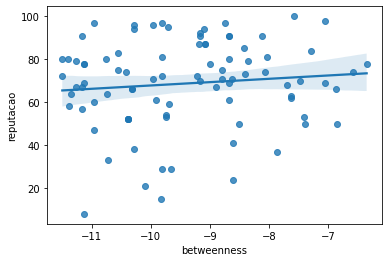

In [36]:
import seaborn as sns
sns.regplot(x=np.log(df_positivos['betweenness']), y=df_positivos['reputacao'])

In [40]:
import statsmodels.formula.api as smf
model = smf.ols(data=df_positivos, formula='reputacao ~ np.log(betweenness) + clustering + degree')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              reputacao   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.3485
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.790
Time:                        14:36:23   Log-Likelihood:                -392.94
No. Observations:                  89   AIC:                             793.9
Df Residuals:                      85   BIC:                             803.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              75.0777     29.346      2.558      0.012      16.729     133.426
np.log(betweenness)     1.4173      3.384      0.419      0.676      -5.311       8.145
clustering              6.0702     40.007      0.152      0.880     -73.474      85.614
degree                 13.3403     40.848      0.327      0.745     -67.877      94.557
==============================================================================
Omnibus:                        8.497   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.375
Skew:                          -0.740   Prob(JB):                       0.0152
Kurtosis:                       3.265   Cond. No.                         234.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
!pip install openpyxl

In [ ]:
df = pd.read_excel('netflix.xlsx')
df = df.dropna(subset=['Genre'])
df = df.reset_index()
df

In [26]:
## SEPARANDO EM FILMES E SERIES:

# FILMES
df_filmes = df.copy(deep=True)

for i in range(df_filmes.shape[0]):
    if df_filmes["Series or Movie"].loc[i]!= "Movie":
        df_filmes = df_filmes.drop([i]) 
        
df_filmes.head()  

,betweenness,clustering,degree


In [ ]:
# SERIES
df_series = df.copy(deep=True)

for i in range(df_series.shape[0]):
    if df_series["Series or Movie"].loc[i]!= "Series":
        df_series = df_series.drop([i]) 
        
df_series.shape

In [ ]:
df_series.shape

In [29]:
lista_filmes=df_filmes["Title"].tolist()
# lista_series=df_series["Title"].tolist()

In [42]:
grafo_completo = load_gt('projeto-one-mode-dicotomizado.net.gz')

# Filmes

In [30]:
# Criando o Grafo
grafo_filme = Graph(directed = False)
for v in grafo_filme.vertices():
    if grafo_filme.vp['nome'][v] not in lista_filmes:
        print(v)
        grafo_filme.remove_vertex(v)
        

In [20]:
save_gt(grafo_filme, 'projeto-Grafo_Filmes.net.gz')

In [44]:
grafo_filme = load_gt('projeto-Grafo_Filmes.net.gz')

In [31]:
# calculo clustering coefficient
c = clustering.local_clustering(grafo_filme)

# calculo betweenness
bc, _ = centrality.betweenness(grafo_filme)

# calculo degree
dc = degree_gt(grafo_filme)

grafo_filme.vp['betweenness'] = bc
grafo_filme.vp['clustering'] = c
grafo_filme.vp['degree'] = dc

In [32]:
df = pd.DataFrame({k: list(v) for k, v in grafo_filme.vp.items()})

In [33]:
df

,betweenness,clustering,degree


In [27]:
## SEPARANDO EM FILMES E SERIES:

# FILMES
df_filmes = pd.read_excel("netflix.xlsx")
df_filmes = df_filmes[df_filmes["Series or Movie"] == "Movie"]

df_filmes.head() 

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube
5,Snowroller,Comedy,"Sports Movies,Sports Comedies,Comedies,Swedish...","Swedish, English, German, Norwegian",Movie,5.3,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,Lasse Åberg,"Lasse Åberg, Bo Jonsson",...,2021-03-03,NaN,https://www.netflix.com/watch/81382187,https://www.imdb.com/title/tt0090115,"Two friends take a ski trip to the Alps, where...",5926.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BZDY2NG...,https://www.youtube.com/watch?v=tjWouBLwe3c,YouTube
6,The Invisible,"Crime, Drama, Fantasy, Mystery, Thriller","Thriller Movies,Movies Based on Books,Supernat...",English,Movie,2.0,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,David S. Goyer,"Mats Wahl, Mick Davis, Christine Roum",...,2021-03-03,"Touchstone Pictures, Spyglass Entertainment",https://www.netflix.com/watch/81382078,https://www.imdb.com/title/tt0435670,"Critically injured after a brutal beating, a t...",34738.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BNjQ3Mj...,https://www.youtube.com/watch?v=yDB3Ha3vxyc,YouTube


In [25]:
# filmes_score = filmes[['IMDb Score', 'Title']].rename(columns={"Title":"nome"})
filmes_score = df_filmes[['Rotten Tomatoes Score', 'Title']].rename(columns={"Title":"nome"})

filmes_score.nome = filmes_score.nome.astype(str, copy=False)
df.nome = df.nome.astype(str, copy=False)
df.id = df.id.astype(int, copy=False)

filmes_score = filmes_score.drop_duplicates(subset=['nome'], keep=False)

filmes_score = filmes_score.dropna()
filmes_score.head()



AttributeError: 'DataFrame' object has no attribute 'nome'

In [ ]:
df = df.set_index('nome').join(filmes_score.set_index('nome'), how='left').reset_index()

In [ ]:
# nova métrica: reputação
df = df.rename(columns={"Rotten Tomatoes Score": 'reputacao'})

In [ ]:
df = df.dropna() 

In [ ]:
df.head(4)

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# pegamos apenas os betweenness com valores > 0 
df_positivos = df[df['betweenness'] > 0]
df_positivos.head(4)

In [ ]:
sns.regplot(x=np.log(df_positivos['betweenness']), y=df_positivos['reputacao'])

In [ ]:
model = smf.ols(data=df_positivos, formula='reputacao ~ np.log(betweenness) + clustering + degree')
result = model.fit()
result.summary()

# Séries

In [ ]:
# Criando o Grafo
grafo_series = Graph(directed = False)
grafo_series = grafo_completo
for v in grafo_series.vertices():
    if grafo_series.vp['nome'][v] not in lista_series:
        print(v)
        grafo_series.remove_vertex(v)

In [ ]:
save_gt(grafo_series, 'projeto-Grafo_Series.net.gz')

In [ ]:
# calculo clustering coefficient
c = clustering.local_clustering(grafo_series)

# calculo betweenness
bc, _ = centrality.betweenness(grafo_series)

# calculo degree
dc = degree_gt(grafo_series)

grafo_series.vp['betweenness'] = bc
grafo_series.vp['clustering'] = c
grafo_series.vp['degree'] = dc

In [ ]:
df = pd.DataFrame({k: list(v) for k, v in grafo_series.vp.items()})

In [ ]:
df

In [ ]:
series_score = df_series[['Rotten Tomatoes Score', 'Title']].rename(columns={"Title":"nome"})

series_score.nome = series_score.nome.astype(str, copy=False)
df.nome = df.nome.astype(str, copy=False)
df.id = df.id.astype(int, copy=False)

series_score = series_score.drop_duplicates(subset=['nome'], keep=False)

series_score = series_score.dropna()
series_score.head()



In [ ]:
df = df.set_index('nome').join(series_score.set_index('nome'), how='left').reset_index()
# nova métrica: reputação
df = df.rename(columns={"Rotten Tomatoes Score": 'reputacao'})
df = df.dropna() 
df.head(4)

In [ ]:
df_positivos = df[df['betweenness'] > 0]
df_positivos.head(4)

In [ ]:
sns.regplot(x=np.log(df_positivos['betweenness']), y=df_positivos['reputacao'])

In [ ]:
model = smf.ols(data=df_positivos, formula='reputacao ~ np.log(betweenness)')
result = model.fit()
result.summary()